# Chapter 3 Classification

There are two most common tasks in **supervised machine learning**: **regression** (predicting values) and **classification** (predicting classes). In this chapter, we focuse on building classification systems.

## Data Preparation

We will use the MNIST dataset of handwritten images as an example.

- Load MNIST dataset using sklearn.datasets.fetch_mldata() or from http://yann.lecun.com/exdb/mnist/ with python-mnist package.
- Construct training set and test set. We will use training set to build the classifier, and use test set to evaluate its performance.
- Explore the dataset (find size of dataset, show a random image, show multiple images

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
images = mnist['data']
labels = mnist['target']

In [6]:
images.shape

(70000, 784)

In [7]:
some_digit = images[12345]
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  37., 255., 135.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

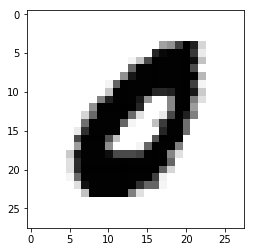

In [9]:
# Use imshow() from matplotlib to show the image
some_digit = images[123]
some_digit = some_digit.reshape([28, 28])
plt.imshow(some_digit,
           cmap=mpl.cm.binary)

## Build a Binary Clasifier

To start, we aim at building a binary classifier to identify if an handwritten digit is five.

- Create the labels for binary classification (1 for five, and 0 for all other digits)
- Apply the **k-nearest-neighbor algorithm** using sklearn.neighbors.KNeighborsClassifier.
- Use its fit() method to train the model, use predict method to make predictions on given images.

In [10]:
type(labels)

numpy.ndarray

In [11]:
# create an array labels_5 to store the truth value of the label being 5 
labels_5 = (labels == 5)
df_labels = pd.DataFrame(labels, columns = ['Label'])
df_labels['Label'].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: Label, dtype: int64

In [12]:
df_labels_5 = pd.DataFrame(labels_5, columns = ['Label'])
df_labels_5['Label'].value_counts()

False    63687
True      6313
Name: Label, dtype: int64

In [13]:
# the orginal labels are sorted
labels[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

## Split the dataset into training set and test set

We must reserve a portion of the data to test the model. The training set is used to train the model, and usually cannot be used to evaluate the model.

In [14]:
# split data into training set and test set, usually we take about 15% as test data
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels_5, test_labels_5 = train_test_split(images, labels_5, test_size = 0.15)

In [15]:
train_images.shape

(59500, 784)

In [16]:
train_labels_5.shape

(59500,)

In [17]:
train_labels_5[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True])

Next we apply KNeighborsClassifier to build a binary classifier

In [ ]:
# VERY SLOW, apply KNN model to build the binary classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs = 1)
knn.fit(train_images, train_labels_5)

In [ ]:
# VERY SLOW, use the model to make predictions on the test set
predictions_knn = knn.predict(test_images)

In [ ]:
# use SGDClassifier 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_images, train_labels_5)

In [ ]:
predictions = sgd.predict(test_images)

## Evaluate Performance of a Classifier

- Use sklearn.metrics.accuracy_score to calculate classification accuracy on the training set and on the test set.
- Display the images where the model predicts wrong.
- Use cross-validation to evaluate the performance of the model on various training and test sets.
- Use confusion matrix to show the percentage of **false positives** and **true negatives**.

In [ ]:
# Calculate the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_5, predictions)
train_predictions = sgd.predict(train_images)
train_accuracy = accuracy_score(train_labels_5, train_predictions)
print(test_accuracy, train_accuracy)

#### Cross Validation
- partition the dataset into k mutully-exclusive subsets
- perform training on all but the 1st set, test the performance on the 1st set.
- perform training on all but the 2nd set, test the performance on the 2nd set.
- perform training on all but the 3rd set, test the performance on the 3rd set.
- ....
- perform training on all but the last set, test the performance on the last set.

In this way, the model is tested on k different training sets. If all performances are acceptable, we should have high confidence on the model.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(sgd, train_images, train_labels_5, cv=5,
                                 scoring='accuracy')

In [ ]:
print(accuracy_scores)

### Confusion Matrix
For each pair of class A and B:
- count the number of instances of class A being classified as B
- count the number of instances of class B being classified as A

The numbers will form an $n\times n$ matrix, where $n$ is the number of classes.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels_5, predictions)
print(conf_mat)

**For binary classifiers**:
confusion matrx = [[TN, FP], [FN, TP]]

- TN: true negative
- FP: false positive
- FN: false negative
- TP: true positive

**Precision** = TP / (TP + FP)

- What does precision represent?
- Can a bad model have high precision?


**Recall** = TP / (TP + FN)
- What does recall represent?
- Can a bad model have high recall?

$F_1$ **score**

$F_1 = \frac{1}{\frac{1}{precision} + \frac{1}{recall}}$

## More Performance Measures

- Precision-Recall tradeoff
- Distribution of scores
- ROC curve: False positive vs. True Positive
- AUC (Area under curve)

# Multiclass Classification

- Some models can directly handle multiple classes (Random forest, naive Bayes, neural networks)
- One vs. All: build a binary classifier for each class, compare their prediction scores
- One vs. One: build a binary classifier for each pair of classes, and see which class wins most duels

**Q: How to evaluate a multiclass classifier?**

Further topics:

- multilabel classification
- multioutput classification

## Homework

1. Training machine learning models on MNIST data with augmentation:
    - Use scipy.ndimage.interpolation.shift() function to shift each image in the MNIST training dataset in the following ways: 1) 1 pixel up; 2) 1 pixel down; 3) 1 pixel to the left; 4) 1 pixel to the right.
    - Use SGDClassifier to build a binary classifier on the augmented dataset that identifies if the image is **9**.
    - Evaluate the performance of the classifier by showing: 1) test accuracy; 2) confusion matrix; 

2. (extra credits) Chapter 3 Exercise 4: Build a spam classifer.

# Shifting image example

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval = 0, mode = "constant")
    return shifted_image.reshape([-1])

In [ ]:
image = train_images[1000]

train_labels = np.array(train_labels)
train_images = np.array(train_images)

shifted_image_up = shift_image(image, 0, -1)
shifted_image_down = shift_image(image, 0, 1)
shifted_image_left = shift_image(image, -1, 0)
shifted_image_right = shift_image(image, 1, 0)

print("label: ", train_labels[1000])

plt.figure(figsize = (12, 6))
plt.subplot(231)
plt.title("Original", fontsize = 14)
plt.imshow(image.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(232)
plt.title("Shifted up", fontsize = 14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(233)
plt.title("Shifted down", fontsize = 14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(234)
plt.title("Shifted left", fontsize = 14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(235)
plt.title("Shifted right", fontsize = 14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.show()

# Binary classifier for the number 9

In [ ]:
type(labels)

In [ ]:
labels_9 = (labels == 9)
df_labels = pd.DataFrame(labels, columns = ['Label']) # comment out, may not be necessary if already ran earlier
df_labels['Label'].value_counts()

In [ ]:
df_labels_9 = pd.DataFrame(labels_9, columns = ['Label'])
df_labels_9['Label'].value_counts()

In [ ]:
# the orginial labels are sorted
labels[:100]

In [ ]:
# split into training and test sets
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels_9, test_labels_9 = train_test_split(images, labels+9, test_size = 0.15)

In [ ]:
train_images.shape

In [ ]:
train_labels_9.shape

In [ ]:
train_labels_9[:100]

## KNN being used for binary classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs = 1)
knn.fit(train_images, train_labels_9)

In [ ]:
predictions_knn = knn.predict(test_images)

In [ ]:
# use SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_images, train_labels_9)

In [ ]:
predictions = sgd.predict(test_images)

In [ ]:
# evaluate the performance of the classifier
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_9, predictions)
train_predictions = sgd.predict(train_images)
train_accuracy = accuracy_score(train_labels_9, train_predictions)
print(test_accuracy, train_accuracy)

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(sgd, train_images, train_labels_9, cv = 9, scoring = 'accuracy')

In [ ]:
print(accuracy_scores)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels_9, predictions)
print(conf_mat)